In [22]:
import sklearn

print(sklearn.__version__)

0.24.1


In [23]:
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit( ) method doesn't do anything 
    def fit(self, X , y=None):
        pass
    
    # predict( ) method simply predicts 1 and 0 if Sex feature is 0 and 1 respectively. 
    def predict(self, X):
        pred = np.zeros( ( X.shape[0], 1 ))
        for i in range (X.shape[0]) :
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
        
        return pred

In [24]:
from sklearn.preprocessing import LabelEncoder

# Null treatment function
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df
    
# Drop unnecessary features
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

# Label encoding
def format_features(df):
    df['Cabin']=df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature]=le.transform(df[feature])
    return df

# Data precprocessing function call
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Original data re-loading. 
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=0)

# Dummy classifier learning/prediction/evaluation. 
myclf = MyDummyClassifier()
myclf.fit(X_train ,y_train)

mypredictions = myclf.predict(X_test)
print('Accuracy of dummy classifier: {0:.4f}'.format(accuracy_score(y_test , mypredictions)))

Accuracy of dummy classifier: 0.7877


In [26]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    
    # make zeros vector with same size of input data size
    def predict(self,X):
        return np.zeros( (len(X), 1) , dtype=bool)

# MNIST data loading
digits = load_digits()

print(digits.data)
print("### digits.data.shape:", digits.data.shape)
print(digits.target)
print("### digits.target.shape:", digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape: (1797, 64)
[0 1 2 ... 8 9 8]
### digits.target.shape: (1797,)


In [27]:
digits.target == 7

array([False, False, False, ..., False, False, False])

In [28]:
# Make it binary classification data set. 
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=11)

In [29]:
# Imbalanced label data set. 
print('Label set shape :', y_test.shape)
print('Test set 0, 1 distribution')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train , y_train)
fakepred = fakeclf.predict(X_test)
print('accuracy even if all the prediction is 0 :{:.3f}'.format(accuracy_score(y_test , fakepred)))

Label set shape : (450,)
Test set 0, 1 distribution
0    405
1     45
dtype: int64
accuracy even if all the prediction is 0 :0.900


### Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test , fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

### Precision and Recall
- Precision and recall measurement using MyFakeClassifier

In [32]:
from sklearn.metrics import accuracy_score, precision_score , recall_score

print("Precision:", precision_score(y_test, fakepred))
print("Recall:", recall_score(y_test, fakepred))

Precision: 0.0
Recall: 0.0


C:\Users\zephy\anaconda3\envs\python_ml_guide\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- Function for acheiving confusion matrix, accuracy, precision, and recall

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('Confusion matrix')
    print(confusion)
    print('accuracy:{0:.4f}, precision:{1:.4f}, recall:{2:.4f}'.format(accuracy, precision, recall))

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Original data re-loading and preprocessing
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

Confusion matrix
[[104  14]
 [ 13  48]]
accuracy:0.8492, precision:0.7742, recall:0.7869


### Precision/Recall Trade-off
- predict_proba() method

In [57]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba() shape: {0}'.format(pred_proba.shape))
print('First 3 rows:\n', pred_proba[:3])

#concatenate
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
#np.c_[pred_proba, pred.reshape(-1,1)]
print('Select bigger probability\n', pred_proba_result[:5])

pred_proba() shape: (179, 2)
First 3 rows:
 [[0.46228984 0.53771016]
 [0.87873308 0.12126692]
 [0.8772212  0.1227788 ]]
Select bigger probability
 [[0.46228984 0.53771016 1.        ]
 [0.87873308 0.12126692 0.        ]
 [0.8772212  0.1227788  0.        ]
 [0.88255292 0.11744708 0.        ]
 [0.85543445 0.14456555 0.        ]]


- Utilizing binarizer

In [59]:
from sklearn.preprocessing import Binarizer
X = [[1, -1, 2],
     [2, 0, 0],
     [0,1.1,1.2]]
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


* Binarizer with threshold 0.5 

In [64]:
from sklearn.preprocessing import Binarizer
# threshold 0.5
custom_threshold = 0.5

# apply binarizer on predict_proba() returned array's second column
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
get_clf_eval(y_test, custom_predict)

Confusion matrix
[[104  14]
 [ 13  48]]
accuracy:0.8492, precision:0.7742, recall:0.7869


* Binarizer with threshold 0.4

In [65]:
# decrease the threshold to 0.4
# threshold 0.5
custom_threshold = 0.4

# apply binarizer on predict_proba() returned array's second column
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
get_clf_eval(y_test, custom_predict)

Confusion matrix
[[98 20]
 [10 51]]
accuracy:0.8324, precision:0.7183, recall:0.8361


* Testing multiple thresholds

In [67]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_thresholds(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('Threshold:', custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_thresholds(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

Threshold: 0.4
Confusion matrix
[[98 20]
 [10 51]]
accuracy:0.8324, precision:0.7183, recall:0.8361
Threshold: 0.45
Confusion matrix
[[103  15]
 [ 12  49]]
accuracy:0.8492, precision:0.7656, recall:0.8033
Threshold: 0.5
Confusion matrix
[[104  14]
 [ 13  48]]
accuracy:0.8492, precision:0.7742, recall:0.7869
Threshold: 0.55
Confusion matrix
[[109   9]
 [ 15  46]]
accuracy:0.8659, precision:0.8364, recall:0.7541
Threshold: 0.6
Confusion matrix
[[112   6]
 [ 16  45]]
accuracy:0.8771, precision:0.8824, recall:0.7377


In [81]:
from sklearn.metrics import precision_recall_curve

# Probability of label 1
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('thresholds array shape:', thresholds.shape)
print('precisions array shape:', precisions.shape)
print('recalls array shape:', recalls.shape)

print('thresholds array 5 samples:', thresholds[:5])
print('precisions array 5 samples:', precisions[:5])
print('recalls array 5 samples:', recalls[:5])

# 15 steps sampling
thr_index = np.arange(0, thresholds.shape[0], 15)
print('indexes for sampling:', thr_index)
print('threshold samples:', np.round(thresholds[thr_index],2))

# 15 steps sampling(precision, recall)
print('precision samples:', np.round(precisions[thr_index],3))
print('recall samples:', np.round(recalls[thr_index],3))

thresholds array shape: (143,)
precisions array shape: (144,)
recalls array shape: (144,)
thresholds array 5 samples: [0.10386437 0.10386659 0.10389152 0.10780392 0.1088369 ]
precisions array 5 samples: [0.38853503 0.38461538 0.38709677 0.38961039 0.38562092]
recalls array 5 samples: [1.         0.98360656 0.98360656 0.98360656 0.96721311]
indexes for sampling: [  0  15  30  45  60  75  90 105 120 135]
threshold samples: [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
precision samples: [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
recall samples: [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


* precision-recall curve depending on threshold change

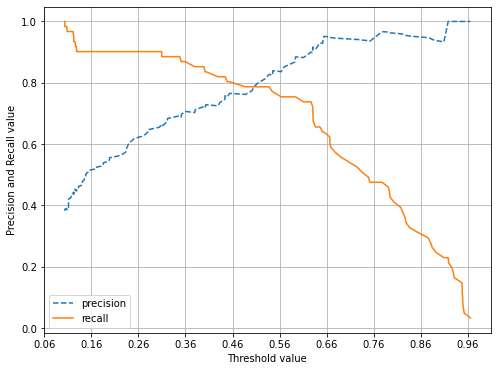

In [93]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # acheiving threshold, precision, recall 
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X-axis: thresholds, Y-axis: precisions & recalls
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[:threshold_boundary], label='recall')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

### F1 Score

In [97]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 score: {0:.4f}'.format(f1))

F1 score: 0.7805


In [101]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # adding F1 score
    f1 = f1_score(y_test, pred)
    print('confusion matrix')
    print(confusion)
    print('accuracy:{0:.4f}, precision:{1:.4f}, recall:{2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_thresholds(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

Threshold: 0.4
confusion matrix
[[98 20]
 [10 51]]
accuracy:0.8324, precision:0.7183, recall:0.8361, F1:0.7727
Threshold: 0.45
confusion matrix
[[103  15]
 [ 12  49]]
accuracy:0.8492, precision:0.7656, recall:0.8033, F1:0.7840
Threshold: 0.5
confusion matrix
[[104  14]
 [ 13  48]]
accuracy:0.8492, precision:0.7742, recall:0.7869, F1:0.7805
Threshold: 0.55
confusion matrix
[[109   9]
 [ 15  46]]
accuracy:0.8659, precision:0.8364, recall:0.7541, F1:0.7931
Threshold: 0.6
confusion matrix
[[112   6]
 [ 16  45]]
accuracy:0.8771, precision:0.8824, recall:0.7377, F1:0.8036


### ROC Curve and AUC

In [114]:
from sklearn.metrics import roc_curve
# predicted probability for label 1
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1) 
# value sampling
thr_index = np.arange(1, thresholds.shape[0], 5) #threshold[0] is set to max(predicted probability)+1 so disregard
print('index for sampling:', thr_index)
print('sampled thresholds:', np.round(thresholds[thr_index],3))
# sampled fprs and tprs
print('sampled fprs:', np.round(fprs[thr_index],3))
print('sampled tprs:', np.round(tprs[thr_index],3))

index for sampling: [ 1  6 11 16 21 26 31 36 41 46 51]
sampled thresholds: [0.965 0.654 0.63  0.563 0.454 0.402 0.348 0.148 0.125 0.112 0.108]
sampled fprs: [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
sampled tprs: [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


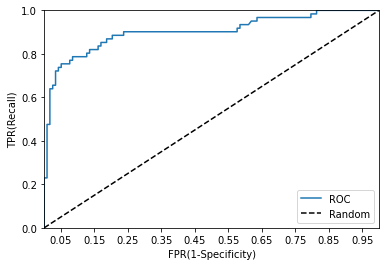

In [115]:
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    #ROC curve
    plt.plot(fprs, tprs, label = 'ROC')
    #Straight line indicating random case
    plt.plot([0,1], [0,1], 'k--', label='Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Specificity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()

roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [118]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC value :{0:.4f}'.format(roc_score))

ROC AUC value :0.9024


In [120]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    #ROC_AUC 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('Confusion matrix')
    print(confusion)
    print('Accuracy:{0:.4f}, Precision:{1:.4f}, Recall:{2:.4f}, F1:{3:.4f}, ROC_AUC:{4:.4f}'.format(
    accuracy, precision, recall, f1, roc_auc))

get_clf_eval(y_test, pred, pred_proba)

Confusion matrix
[[104  14]
 [ 13  48]]
Accuracy:0.8492, Precision:0.7742, Recall:0.7869, F1:0.7805, ROC_AUC:0.9024
